#Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading Model

In [7]:
cnn = tf.keras.models.load_model('/trained_model.h5')

#Visualising and Performing Prediction on Single image


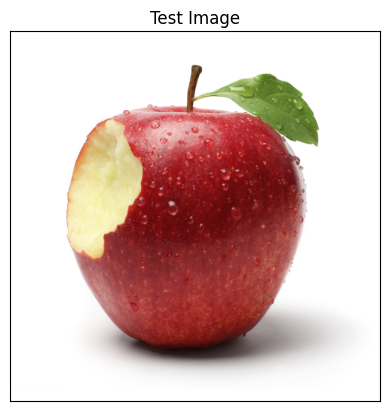

In [16]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruit_Vegetable_Data/test/apple/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 24ms/step


In [18]:
print(predictions)

[[1.0000000e+00 8.8787670e-37 1.9666528e-14 6.9889711e-20 1.3650153e-21
  2.2782937e-12 1.9619737e-21 4.0386786e-27 9.2953929e-15 2.0516252e-29
  6.4436104e-18 1.0675338e-12 4.3291259e-24 1.0076670e-21 1.6801960e-13
  3.7471290e-18 5.3941370e-18 9.5492888e-36 3.6758961e-28 5.3913082e-22
  5.4739588e-20 2.8936231e-19 2.4495784e-15 3.1131730e-16 1.3590923e-28
  4.5130249e-26 3.3803162e-20 2.8332208e-19 4.6437958e-26 5.8527599e-32
  5.1022470e-29 4.4706973e-28 6.6886494e-18 1.1686734e-21 8.9443693e-16
  1.4425324e-18]]


In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [12]:
# test_set.class_names

In [20]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


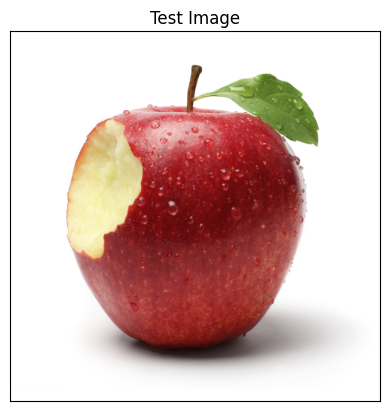

In [21]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a apple
